In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
import pandas as pd

In [ ]:
df1 = pd.read_csv("sent_emails.csv")

In [ ]:
df2 = pd.read_csv("responded.csv")

In [ ]:
df3 = pd.read_csv("userbase.csv")

In [ ]:
sent_emails_test = df1.head(1000)

In [ ]:
sent_emails_test.to_csv("sent_emails_test.csv")

In [ ]:
df1

In [ ]:
df2

In [ ]:
df2.sort_values(by='Customer_ID')

In [ ]:
df3

In [ ]:
import pandas as pd

# merge sent_emails and userbase dataframes based on customer_id
#merged_df = pd.merge(df1, df3, on='Customer_ID', how='left')
transformed_df = df3.copy()
# now merged_df contains all the data from sent_emails and userbase dataframes
# where the customer_id matches
# replace NaN values with a default value
#merged_df = merged_df.fillna(value={'column1': 'default_value1', 'column2': 'default_value2'})

# or remove rows with NaN values
#merged_df = merged_df.dropna()

In [ ]:
transformed_df['Match'] = 0
for index, row in df1.iterrows():
    customer_id = row['Customer_ID']
    subjectline_id = row['SubjectLine_ID']
    match = (df2['Customer_ID'] == customer_id) & (df2['SubjectLine_ID'] == subjectline_id)
    if match.any():
        transformed_df.at[customer_id, 'Match'] = 1
        transformed_df.at[customer_id, 'SubjectLine_ID'] = subjectline_id

In [ ]:
import numpy as np

# Create a new column in merged_df to store the result
transformed_df['Date_Match'] = 0

# Iterate over the rows of merged_df where Match is 1
for index, row in df1[df1['Match'] == 1].iterrows():
    customer_id = row['Customer_ID']
    subjectline_id = row['SubjectLine_ID']
    sent_date = row['Sent_Date']
    match_row = df2[(df2['Customer_ID'] == customer_id) & (df2['SubjectLine_ID'] == subjectline_id)]
    responded_date = match_row['Responded_Date'].values[0]
    if pd.to_datetime(sent_date) == pd.to_datetime(responded_date):
        transformed_df.at[index, 'Date_Match'] = 1
        transformed_df.at[index, 'SubjectLine_ID'] = subjectline_id

In [ ]:
merged_df

In [ ]:
merged_df = df1.merge(df2, on='Customer_ID').merge(df3, on='Customer_ID')

In [ ]:
merged_df['one_day_response']= merged_df.apply(lambda row: 1 if row['Sent_Date'] == row['Responded_Date'] else 0, axis=1)

In [ ]:
merged_df["Date_Match"].value_counts()

In [ ]:
df["Match"].value_counts()

In [ ]:
df = merged_df.drop('Responded_Date', axis=1)

In [ ]:
df.to_csv("transformed_data.csv")

In [ ]:
# I need a function that will take in a sent_date and received date and return 1 if the email was responded to on the same day, 0 otherwise
def one_day_response(row):
    if row['Sent_Date'] == row['Responded_Date']:
        return 1
    else:
        return 0

In [ ]:
df['one_day_response'] = df.apply(one_day_response, axis=1)

In [ ]:
from data_pipeline import ETL_Pipeline

In [ ]:
etl = ETL_Pipeline()

In [ ]:
etl.extract(sent='sent_emails_test.csv')

In [ ]:
etl.transform()

In [ ]:
etl.data.value_counts()

In [ ]:
etl.load('test.csv')

In [ ]:
import pandas as pd

In [ ]:

df = pd.read_csv("test.csv", index_col=0, low_memory=False)

In [ ]:
print(df)

In [7]:
from model import QLearningAgent

In [1]:
from environment import EmailEnvironment

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("transformed_data.csv", index_col=0, low_memory=False)

In [18]:
new_df = df.head(10000)

In [5]:
df.value_counts('Date_Match')

Date_Match
0.0    460772
1.0    188149
Name: count, dtype: int64

In [19]:
# Create the environment
data = new_df.values # Load your data here
env = EmailEnvironment(data)

# Create the Q-learning agent
agent = QLearningAgent(env)

# Train the agent
agent.learn(num_episodes=1)

# Play the agent
stats = agent.play()

In [9]:
agent.learn(num_episodes=1)

In [11]:
agent.q_table

{(('M', 'C', 'Mph@msn.com', 38.0, 12.0), 1): -5.75,
 (('F', 'B', 'SophcYN7381qMe8lRqK@aol.com', 37.0, 23.0), 2): -5.75,
 (('F', 'C', 'xE@msn.com', 32.0, 15.0), 3): -5.75,
 (('M', 'C', 'WduR0o0@comcast.net', 31.0, 24.0), 3): -5.75,
 (('M', 'C', 'walHI9cmWJIBKvy0@aol.com', 35.0, 13.0), 2): -5.75,
 (('F', 'B', 'OoececBAnkd@yahoo.com', 38.0, 23.0), 2): -8.125,
 (('M', 'C', '5BzoRFTP6tdHfs@hotmail.com', 38.0, 7.0), 1): -5.75,
 (('F', 'C', 'BHyROtaYxz2ix11@comcast.net', 35.0, 10.0), 1): -5.75,
 (('F', 'C', 'KMBMKcI60@gmail.com', 33.0, 8.0), 1): -5.75,
 (('M', 'C', 'v4oFiwefIEWJguk@msn.com', 33.0, 13.0), 3): 6.875,
 (('M', 'B', 'EGmvTx@yahoo.com', 40.0, 12.0), 3): -5.75,
 (('M', 'C', 'hOTxWSnanALfSiv@gmail.com', 27.0, 11.0), 2): -5.75,
 (('M', 'C', 'uqCdy@hotmail.com', 33.0, 11.0), 2): -5.75,
 (('M', 'C', 'qmdV2@yahoo.com', 42.0, 13.0), 3): -5.75,
 (('M', 'C', 'Gb6du3vhnGVhT5alS1y@yahoo.com', 29.0, 11.0), 1): -5.75,
 (('M', 'C', 'Zd@msn.com', 28.0, 23.0), 2): -5.75,
 (('M', 'C', 'CgDbX7YrR3i@

In [13]:
agent.get_best_action(('F', 'C', '2g59qoro4lGQNV60j@gmail.com', 24.0, 14.0))

[1]

In [16]:
agent.learn(num_episodes=100)

In [ ]:
len(agent.q_table)

In [14]:
stats

{'total_reward': -44690.0,
 'average_reward': -4469.0,
 'max_reward': -4290.0,
 'min_reward': -4650.0,
 'num_episodes': 10}

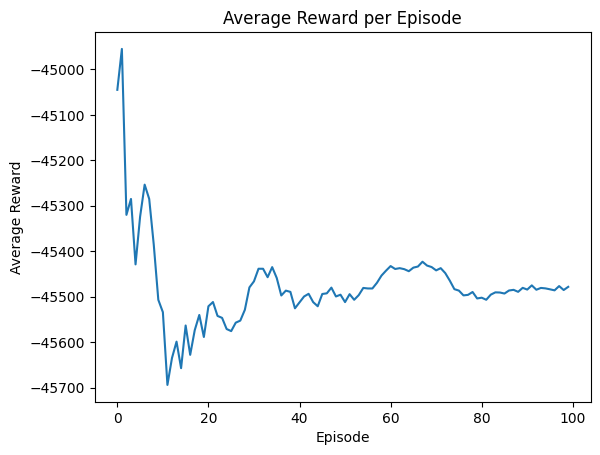

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Train the agent
episode_rewards = []
for episode in range(100):
    episode_reward = 0.0
    state = env.reset()
    done = False
    while not done:
        action = agent.choose_action(state)
        next_state, reward, done, _ = env.step(action)
        episode_reward += reward
        state = next_state
    episode_rewards.append(episode_reward)

# Calculate the average reward per episode
avg_rewards = [np.mean(episode_rewards[0:i]) for i in range(1, len(episode_rewards) + 1)]

# Plot the average reward per episode
plt.plot(avg_rewards)
plt.xlabel('Episode')
plt.ylabel('Average Reward')
plt.title('Average Reward per Episode')
plt.show()

In [ ]:
from data_pipeline import ETL_Pipeline

In [ ]:
etl = ETL_Pipeline()

In [ ]:
etl.extract()

In [ ]:
etl.transform()

In [ ]:
etl.load("test.csv")

In [25]:
!python reinforcement_learning_service.py

Importing model... /train will do a full training of a new model but takes an undetermined amount of time
starting server...
 * Serving Flask app 'reinforcement_learning_service'
 * Debug mode: off
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:8793
 * Running on http://172.17.0.2:8793
Press CTRL+C to quit
^C
